# <div style=" text-align: center; font-weight: bold">Phase 04: Modelling</div>



Trong cột `Price` của dataframe, chúng ta có thể thấy rằng có nhiều giá trị là `Thỏa thuận`. Trong phần này, chúng ta sẽ xây dựng mô hình để dự đoán giá của các bất động sản thuộc loại `Căn hộ chung cư` có giá `Thỏa thuận` dựa trên các thuộc tính của chúng.

## **Import thư viện**

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
# !pip install joblib
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### **Đọc dữ liệu**


In [40]:
real_estate_for_sale_df = pd.read_csv('../Data/cleaned_real_estate_for_sale.csv', encoding='utf-8')

### **Tiền xử lí dữ liệu**


In [41]:
apartment_df = real_estate_for_sale_df[real_estate_for_sale_df['Type'] == 'Căn hộ chung cư']

#### **Loại bỏ các đặc trưng không cần thiết cho mô hình:**
- Chúng ta có thể thấy rằng cột `Project` có nhiều giá trị riêng lẻ, đồng thời cột `Posting date` không mang nhiều ý nghĩa, vì vậy chúng ta sẽ loại bỏ chúng.

In [42]:
# Drop unncessary columns
apartment_df = apartment_df.copy()
apartment_df.drop(columns= ['Project', 'Posting date'], axis= 1, inplace= True)

Bên cạnh đó, như chúng ta đã thảo luận trước đó, đối với `Căn hộ chung cư`, các cột `Floor`, `Furniture` và `Legal` không ảnh hưởng nhiều đến giá, vì vậy chúng ta cũng sẽ loại bỏ chúng.

In [43]:
apartment_df.drop(columns= [ 'Floor(Tầng)', 'Furniture', 'Legal'], axis= 1, inplace= True)

In [44]:
# Perform one hot encoding for District
apartment_df = pd.get_dummies(apartment_df, columns=['District'])
apartment_df.drop(columns=['Type'], inplace= True)

Chia dữ liệu

In [45]:
# Extract price the is not Thỏa thuận for the traning model.
processed_apartment_df = apartment_df[apartment_df['Price(VNĐ)'].notna()]
data_to_predict_df = apartment_df[apartment_df['Price(VNĐ)'].isna()]

In [46]:
# Set new unit for Price to get more effecienct in the train process.
processed_apartment_df .loc[:,'Price(VNĐ)'] = processed_apartment_df.loc[:,'Price(VNĐ)'] / 1000000
processed_apartment_df.rename(columns= {'Price(VNĐ)' : 'Price (Million)'}, inplace=True)

C:\Users\bkphu\AppData\Local\Temp\ipykernel_10732\158685934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_apartment_df.rename(columns= {'Price(VNĐ)' : 'Price (Million)'}, inplace=True)




## **Build model**

Các mô hình sẽ được sử dụng:
- **Linear Regression**
- **Ridge Regression**
- **Lasso Regression**
- **ElasticNet Regression**
- **Decision Tree Regression**
- **Random Forest Regression**



In [47]:
# Define X and y features.
X = processed_apartment_df.drop(columns=['Price (Million)'])
y = processed_apartment_df['Price (Million)']

# Split the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Prepare models
model_linear = LinearRegression()
model_ridge = Ridge()
model_lasso = Lasso()
model_elastic_net = ElasticNet()
model_dtree = DecisionTreeRegressor()
model_rforest = RandomForestRegressor()

 Sử dụng `K Fold Cross Validation` để huấn luyện mô hình

In [49]:
# Define score matrix
scoring_metrics = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

# Compare models
model_linear_score = cross_validate(model_linear, X, y, cv = 7, scoring = scoring_metrics)
model_ridge_score = cross_validate(model_ridge,  X, y, cv = 7, scoring = scoring_metrics)
model_lasso_score = cross_validate(model_lasso,  X, y, cv = 7, scoring = scoring_metrics)
model_elastic_net_score = cross_validate(model_elastic_net, X, y, cv = 7, scoring = scoring_metrics)
model_dtree_score = cross_validate(model_dtree,  X, y, cv = 7, scoring = scoring_metrics)
model_rforest_score = cross_validate(model_rforest, X, y, cv = 7, scoring = scoring_metrics)

In [50]:
# Comparing our models
model_test_results = pd.DataFrame(columns=['model_linear_score', 'model_ridge_score', 'model_lasso_score', 'model_elastic_net_score', 'model_dtree_score', 'model_rforest_score'],
                                  index=model_dtree_score.keys())

model_test_results['model_linear_score'] = pd.DataFrame(model_linear_score).abs().mean().to_numpy().round(3)
model_test_results['model_ridge_score'] = pd.DataFrame(model_ridge_score).abs().mean().to_numpy().round(3)
model_test_results['model_lasso_score'] = pd.DataFrame(model_lasso_score).abs().mean().to_numpy().round(3)
model_test_results['model_elastic_net_score'] = pd.DataFrame(model_elastic_net_score).abs().mean().to_numpy().round(3)
model_test_results['model_dtree_score'] = pd.DataFrame(model_dtree_score).abs().mean().to_numpy().round(3)
model_test_results['model_rforest_score'] = pd.DataFrame(model_rforest_score).abs().mean().to_numpy().round(3)

model_test_results


,model_linear_score,model_ridge_score,model_lasso_score,model_elastic_net_score,model_dtree_score,model_rforest_score
fit_time,0.010,0.008,0.124,0.028,0.034,2.832
score_time,0.003,0.003,0.002,0.002,0.003,0.043
test_neg_mean_squared_error,6771212.424,6770982.712,6771839.149,8815554.440,6195174.383,5048019.971
test_neg_mean_absolute_error,1566.103,1565.688,1564.715,1757.392,1124.571,1069.013
test_r2,0.659,0.659,0.659,0.557,0.686,0.748


- Qua bảng kết quả, có thể thấy rằng mô hình `Random Forest` cho kết quả tốt nhất với chỉ số `R2` trên 0.7, tuy nhiên thời gian huấn luyện cũng lâu nhất.

- Mô hình `ElasticNet` có các chỉ số lỗi lớn nhất, cho thấy hiệu suất kém hơn so với các mô hình còn lại.

- Nhìn chung, các mô hình tuyến tính như `Linear Regression`, `Ridge`, `Lasso` cho kết quả khá tương đồng về độ chính xác và sai số.

- Mô hình cây quyết định (`Decision Tree`) và rừng ngẫu nhiên (`Random Forest`) có xu hướng học tốt trên tập huấn luyện nhưng có thể bị overfitting, thể hiện qua sự chênh lệch giữa kết quả train và test.

- Các mô hình đều dự đoán chưa tốt ở các mức giá quá cao, sai số tăng rõ rệt ở phân khúc này.

GridSearchCV để tinh chỉnh siêu tham số

In [51]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(random_state= 42)
}

param_grids = {
    'Linear Regression': {'fit_intercept': [True, False],},
    'Ridge Regression': {'alpha': [0.1, 0.5, 0.75, 1, 10]},
    'Lasso Regression': {'alpha': [0.1, 0.5, 0.75, 1, 10]},
    'ElasticNet Regression': {'alpha': [0.1, 0.5, 1, 10],
                               'l1_ratio': [0.25, 0.5, 0.75, 1]},
    'Decision Tree Regression': {'max_depth': [None, 5, 10, 15],
                                 'min_samples_split': [2, 5, 10],
                                 'min_samples_leaf': [1, 2, 4],},
    'Random Forest Regression': {'n_estimators': [10, 50, 100],
                                  'max_depth': [None, 5, 10, 15],
                                  'min_samples_split': [2, 5, 10],
                                  'min_samples_leaf': [1, 2, 4]}
}

In [52]:

best_params_dict = {}

for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)

    best_params_dict[model_name] = {
        'best_score':  grid_search.best_score_,
        'best_params':  grid_search.best_params_
    }

best_params_dict

{'Linear Regression': {'best_score': -6785531.5127693415,
  'best_params': {'fit_intercept': True}},
 'Ridge Regression': {'best_score': -6785280.419091741,
  'best_params': {'alpha': 1}},
 'Lasso Regression': {'best_score': -6785544.883782202,
  'best_params': {'alpha': 0.1}},
 'ElasticNet Regression': {'best_score': -6785544.883782202,
  'best_params': {'alpha': 0.1, 'l1_ratio': 1}},
 'Decision Tree Regression': {'best_score': -5364903.927471387,
  'best_params': {'max_depth': None,
   'min_samples_leaf': 4,
   'min_samples_split': 2}},
 'Random Forest Regression': {'best_score': -4975788.22868046,
  'best_params': {'max_depth': None,
   'min_samples_leaf': 1,
   'min_samples_split': 10,
   'n_estimators': 50}}}

Huấn luyện mô hình và sử dụng các tham số sau để đánh giá 
- `MAE`: Mean Absolute Error
- `MSE` : Mean Square Error
- `R2 score` : R-Square score
 
 

In [53]:
def find_scores(y, y_pred):
    mae_score = mean_absolute_error(y, y_pred).round(5)
    mse_score = mean_squared_error(y, y_pred).round(5)
    r2_value = r2_score(y, y_pred).round(5)

    return mae_score, mse_score, r2_value

def scatter_plot(y_true, y_pred,  title):
    
    sns.set()
    plt.figure(figsize=(8,5))
    plt.scatter(y_true, y_pred,alpha= 0.5)
    plt.title(title)
    plt.xlabel('Actual prices')
    plt.ylabel('Predicted prices')
    
    sns.despine()
    fig = plt.gcf()
    fig.set_facecolor('#ffe6cc')
    plt.show()


### **1. Multiple Linear Regression:**

In [54]:
best_params = best_params_dict['Linear Regression']['best_params']
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

MAE Train: 1551.13862
MSE Train: 6687399.37762
R2 score: 0.66562


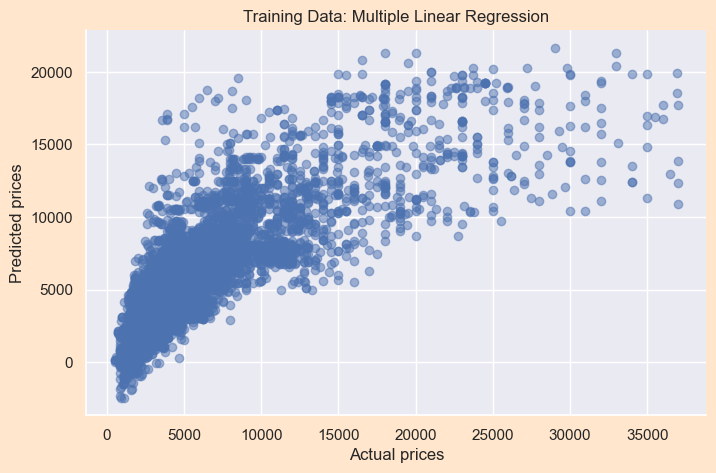

In [55]:
y_pred_train = linear_model.predict(X_train)
mae_score, mse_score, r2_value = find_scores(y_train, y_pred_train)

print(f'MAE Train: {mae_score}')
print(f'MSE Train: {mse_score}')
print(f'R2 score: {r2_value}')

scatter_plot(y_train, y_pred_train, title="Training Data: Multiple Linear Regression")

MAE Test: 1584.71726
MSE Test: 6870383.10517
R2 score: 0.6504


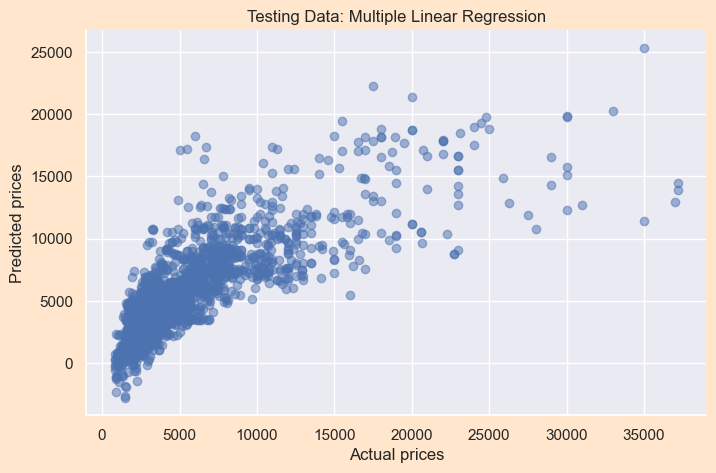

In [56]:
y_pred_test = linear_model.predict(X_test)
mae_score, mse_score, r2_value = find_scores(y_test.values, y_pred_test)

print(f'MAE Test: {mae_score}')
print(f'MSE Test: {mse_score}')
print(f'R2 score: {r2_value}')

scatter_plot(y_test, y_pred_test, title="Testing Data: Multiple Linear Regression")

### **Ridge Regression:**

In [57]:

best_params = best_params_dict['Ridge Regression']['best_params']

ridge_model = Ridge(**best_params)
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

MAE Train: 1550.76545
MSE Train: 6687445.04624
R2 score: 0.66561


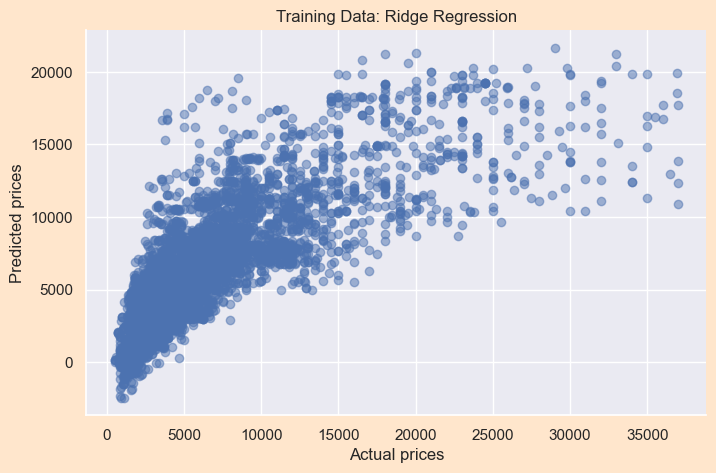

In [58]:
y_pred_train = ridge_model.predict(X_train)
mae_score, mse_score, r2_value = find_scores(y_train.values, y_pred_train)

print(f'MAE Train: {mae_score}')
print(f'MSE Train: {mse_score}')
print(f'R2 score: {r2_value}')

scatter_plot(y_train, y_pred_train, title="Training Data: Ridge Regression")

MAE Train: 1584.22742
MSE Train: 6868620.6755
R2 score: 0.65049


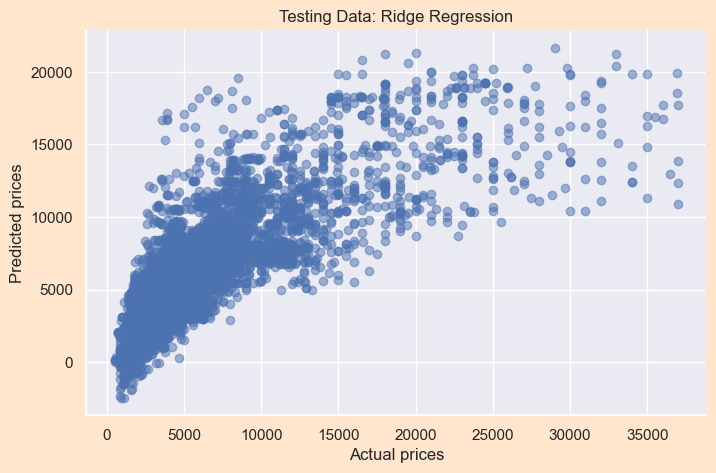

In [59]:
y_pred_test = ridge_model.predict(X_test)
mae_score, mse_score, r2_value = find_scores(y_test.values, y_pred_test)

print(f'MAE Train: {mae_score}')
print(f'MSE Train: {mse_score}')
print(f'R2 score: {r2_value}')

scatter_plot(y_train, y_pred_train, title="Testing Data: Ridge Regression")

### **Lasso regression:**

In [60]:

best_params = best_params_dict['Lasso Regression']['best_params']

lasso_model = Lasso(**best_params)
lasso_model.fit(X_train, y_train)


Lasso(alpha=0.1)

MAE Train: 1550.9806
MSE Train: 6687422.93079
R2 score: 0.66562


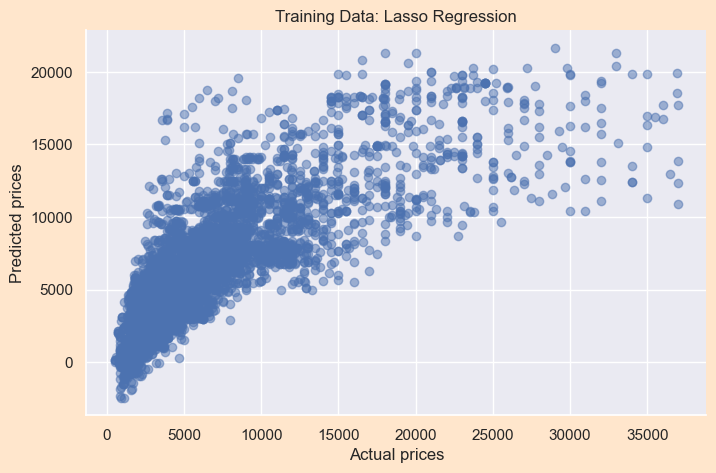

In [61]:
y_pred_train = lasso_model.predict(X_train)
mae_score, mse_score, r2_value = find_scores(y_train.values, y_pred_train)

print(f'MAE Train: {mae_score}')
print(f'MSE Train: {mse_score}')
print(f'R2 score: {r2_value}')

scatter_plot(y_train, y_pred_train, title="Training Data: Lasso Regression")

MAE Test: 1584.51029
MSE Test: 6870026.03486
R2 score: 0.65042


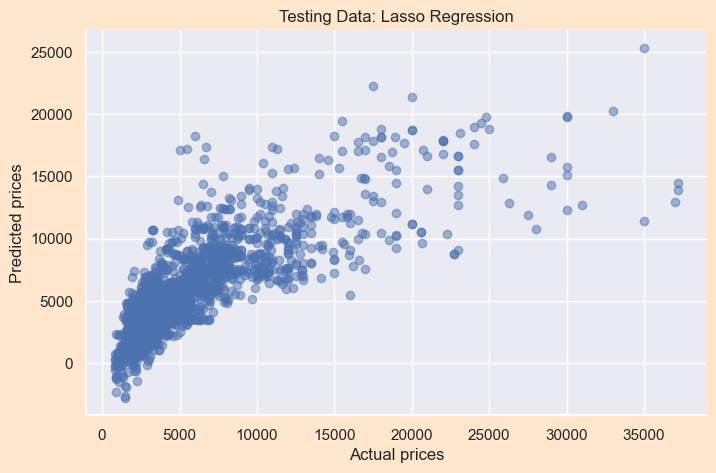

In [62]:
y_pred_test = lasso_model.predict(X_test)
mae_score, mse_score, r2_value = find_scores(y_test.values, y_pred_test)

print(f'MAE Test: {mae_score}')
print(f'MSE Test: {mse_score}')
print(f'R2 score: {r2_value}')

scatter_plot(y_test, y_pred_test, title="Testing Data: Lasso Regression")

### **ElasticNet Regression**

In [63]:

best_params = best_params_dict['ElasticNet Regression']['best_params']
elastic_net_model = ElasticNet(**best_params)
elastic_net_model.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=1)

MAE Train: 1550.9806
MSE Train: 6687422.93079
R2 score: 0.66562


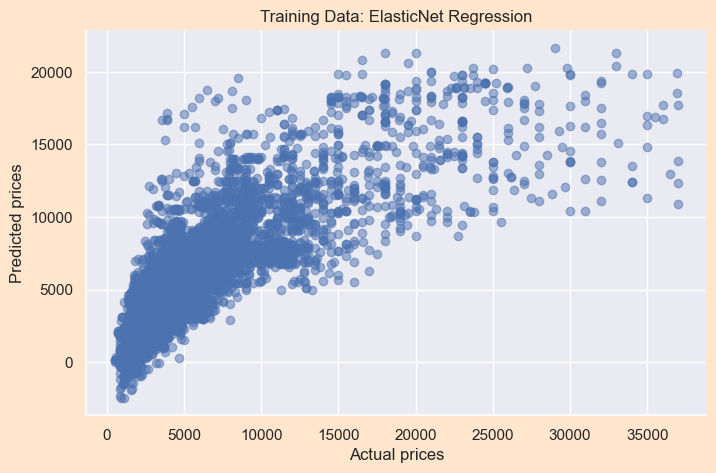

In [64]:
y_pred_train = elastic_net_model.predict(X_train)
mae_score, mse_score, r2_value = find_scores(y_train.values, y_pred_train)

print(f'MAE Train: {mae_score}')
print(f'MSE Train: {mse_score}')
print(f'R2 score: {r2_value}')

scatter_plot(y_train, y_pred_train, title="Training Data: ElasticNet Regression")

MAE Test: 1584.51029
MSE Test: 6870026.03486
R2 score: 0.65042


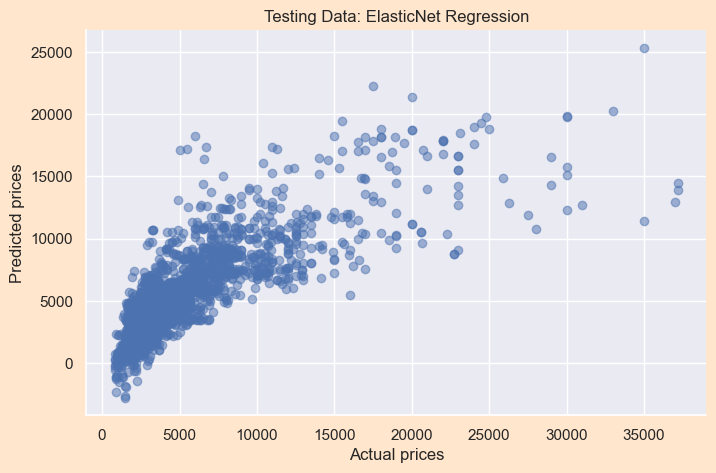

In [65]:
y_pred_test = elastic_net_model.predict(X_test)
mae_score, mse_score, r2_value = find_scores(y_test.values, y_pred_test)

print(f'MAE Test: {mae_score}')
print(f'MSE Test: {mse_score}')
print(f'R2 score: {r2_value}')

scatter_plot(y_test, y_pred_test, title="Testing Data: ElasticNet Regression")

### **Decision Tree Regression**

In [66]:
best_params = best_params_dict['Decision Tree Regression']['best_params']

decision_tree_model = DecisionTreeRegressor(**best_params)
decision_tree_model.fit(X_train, y_train)


DecisionTreeRegressor(min_samples_leaf=4)

MAE Train: 907.8737
MSE Train: 3229649.8167
R2 score: 0.83851


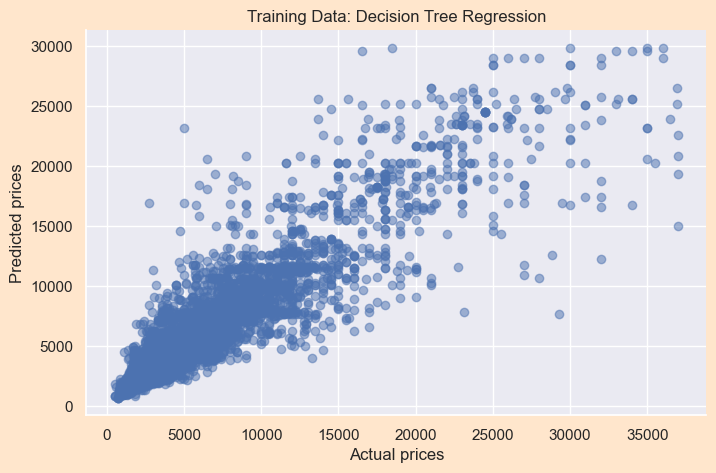

In [67]:
y_pred_train = decision_tree_model.predict(X_train)
mae_score, mse_score, r2_value = find_scores(y_train.values, y_pred_train)

print(f'MAE Train: {mae_score}')
print(f'MSE Train: {mse_score}')
print(f'R2 score: {r2_value}')

scatter_plot(y_train, y_pred_train, title="Training Data: Decision Tree Regression")

MAE Test: 1093.06633
MSE Test: 4945699.0717
R2 score: 0.74834


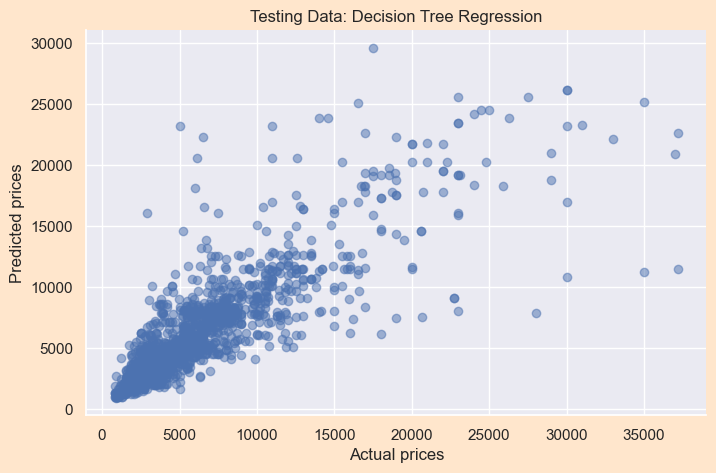

In [68]:
y_pred_test = decision_tree_model.predict(X_test)
mae_score, mse_score, r2_value = find_scores(y_test.values, y_pred_test)

print(f'MAE Test: {mae_score}')
print(f'MSE Test: {mse_score}')
print(f'R2 score: {r2_value}')

scatter_plot(y_test, y_pred_test, title="Testing Data: Decision Tree Regression")

### **Random Forest Regression**

In [69]:

best_params = best_params_dict['Random Forest Regression']['best_params']

random_forest_model = RandomForestRegressor(**best_params, random_state=42)
random_forest_model.fit(X_train, y_train)


RandomForestRegressor(min_samples_split=10, n_estimators=50, random_state=42)

In [70]:
y_pred_train = random_forest_model.predict(X_train)
mae_score, mse_score, r2_value = find_scores(y_train.values, y_pred_train)

print(f'MAE Train: {mae_score}')
print(f'MSE Train: {mse_score}')
print(f'R2 score: {r2_value}')


MAE Train: 853.16739
MSE Train: 2791138.43011
R2 score: 0.86044


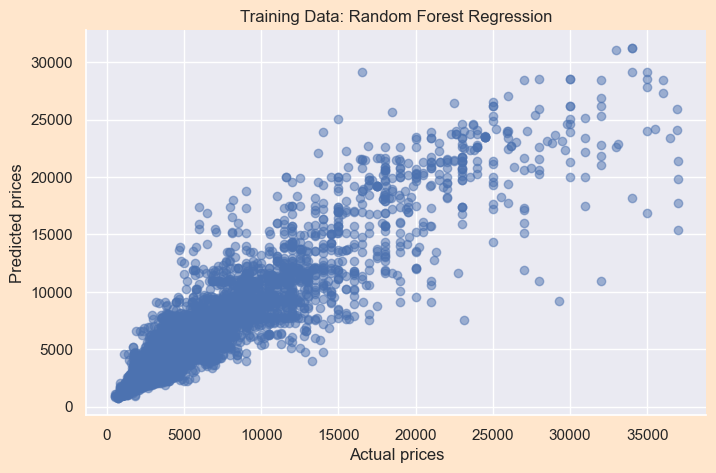

In [71]:
scatter_plot(y_train, y_pred_train, title="Training Data: Random Forest Regression")

In [72]:
y_pred_test = random_forest_model.predict(X_test)
mae_score, mse_score, r2_value = find_scores(y_test.values, y_pred_test)

print(f'MAE Test: {mae_score}')
print(f'MSE Test: {mse_score}')
print(f'R2 score: {r2_value}')

MAE Test: 1057.01881
MSE Test: 4506812.3974
R2 score: 0.77067


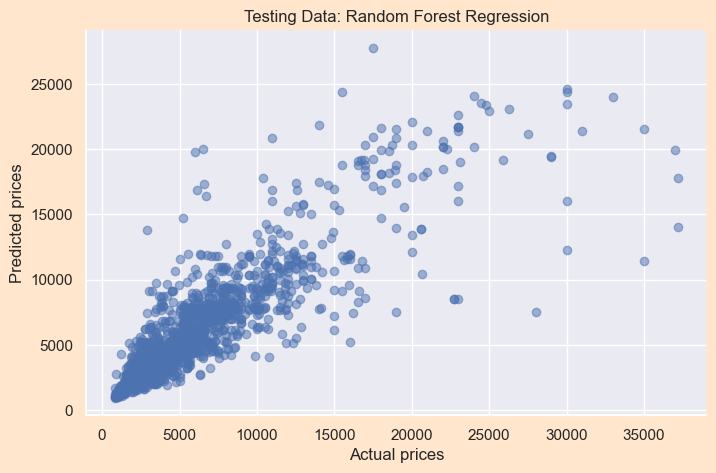

In [73]:
scatter_plot(y_test, y_pred_test, title="Testing Data: Random Forest Regression")

**Tổng quan:**  
- Với `Hồi quy tuyến tính đa biến`, `Ridge`, `Lasso`, `ElasticNet`, kết quả trên tập huấn luyện và tập kiểm tra gần như tương đương (khoảng **0.65**). Các chỉ số `MAE` và `MSE` cũng không thay đổi nhiều giữa tập huấn luyện và tập kiểm tra. Ở đây, có thể thấy rõ xu hướng của dữ liệu được dự đoán: giá trị dự đoán có xu hướng **cao hơn** ở phân khúc giá thấp, nhưng ở phân khúc giá cao, giá trị dự đoán thường **thấp hơn** so với giá trị thực tế.  

- Về `Cây quyết định` và `Rừng ngẫu nhiên`, kết quả trên tập huấn luyện khá tốt (lên đến **0.83** và **0.86**), nhưng trên tập kiểm tra, kết quả chỉ đạt **0.74** và **0.77**. Đồng thời, `MAE` và `MSE` tăng đáng kể (gần **gấp đôi** đối với `MSE` của `Rừng ngẫu nhiên`), do đó có thể xem xét rằng các mô hình này có khả năng bị **quá khớp** đây.  

- Qua biểu đồ, có thể thấy tất cả các mô hình không hoạt động tốt đối với các mức giá quá cao (**trên 25000**). Ở phân khúc giá này, sự chênh lệch giữa giá thực tế và giá dự đoán có thể được **quan sát rõ ràng**.

### Deploy:
Chúng ta sẽ sử dụng mô hình Decision Tree

In [74]:
# Extract the infomation to predict
predict_data = data_to_predict_df.drop(columns=['Price(VNĐ)'])

In [75]:
# Predict the price base on the given information
y_pred = decision_tree_model.predict(predict_data)

In [76]:
data_to_predict_df.loc[:,'Price(Million)'] = y_pred
data_to_predict_df.drop(columns= 'Price(VNĐ)', inplace= True)
data_to_predict_df

C:\Users\bkphu\AppData\Local\Temp\ipykernel_10732\3951568062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_predict_df.loc[:,'Price(Million)'] = y_pred
C:\Users\bkphu\AppData\Local\Temp\ipykernel_10732\3951568062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_predict_df.drop(columns= 'Price(VNĐ)', inplace= True)


,Area(m2),Bedroom(Phòng),Toilet(Phòng),District_1,District_10,District_11,District_12,District_2,District_3,District_4,...,District_Bình Thạnh,District_Bình Tân,District_Gò Vấp,District_Hóc Môn,District_Nhà Bè,District_Phú Nhuận,District_Thủ Đức,District_Tân Bình,District_Tân Phú,Price(Million)
16,72.00,2.0,2.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,5324.583333
45,79.11,2.0,2.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,6253.333333
49,78.00,2.0,2.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,4558.000000
162,99.00,3.0,3.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,13600.000000
181,108.00,3.0,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,10280.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43617,100.00,3.0,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,5758.312500
43696,56.00,2.0,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1823.333333
43706,65.00,2.0,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2146.000000
43719,26.00,1.0,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1138.571429


In [77]:

joblib.dump(decision_tree_model, "../Deploy/decision_tree_model_for_sale.sav")

['../Deploy/decision_tree_model_for_sale.sav']